# Learning Goals:

1. Jupyter functionality for markdown text
2. Plotting with matplotlib
3. Using scikit-learn for k-means
4. Calculate silhouette_score

# 1. Markdown

You can do cool stuff with markdown. You can make numbered or bullet lists. You can even write cool equations like: $\sum{x}=\log(y)$

# 2. Matplotlib
matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
x=np.array(range(10))
y=np.array([1,1.1,1.2,1.3,4,2.3,3.9,7,10,15])

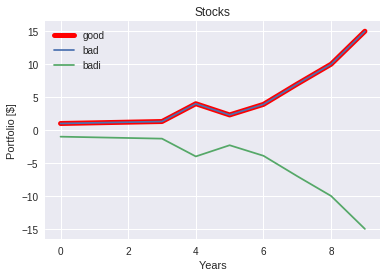

In [45]:
#plt.plot(x,y)
plt.plot(x,y,color='r',linewidth=5)
plt.plot(x,y,x,-y)
plt.xlabel('Years')
plt.ylabel('Portfolio [$]')
plt.title('Stocks')
plt.legend(['good','bad','badi'])
#plt.xlim([-1,5])
#plt.ylim([1,10])
plt.show()

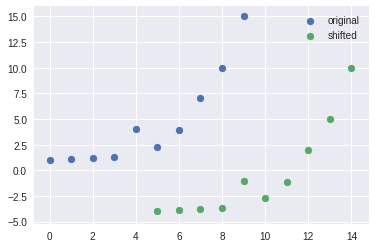

In [16]:
plt.scatter(x,y)
plt.scatter(x+5,y-5)
plt.legend(['original','shifted'])
plt.show()

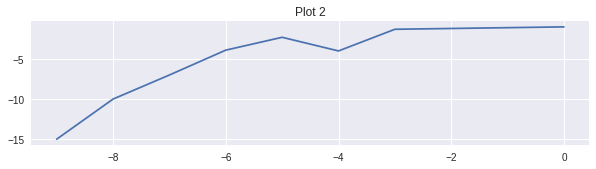

In [46]:
plt.figure(1,figsize=(10,5))
plt.subplot(121)
plt.title('Plot 1')
plt.plot(x,y)
plt.subplot(212)
plt.title('Plot 2')
plt.plot(-x,-y)
plt.show()

# 3. Scikit-learn K-means

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [0]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [31]:
X = np.array([[1, 2], [1, 4], [1.5, 3], [4, 2], [4, 4], [3.5, 1.9],[3.7,3],[4.2,3.8]])
print(X.shape)
df = pd.DataFrame(X)
#df.head()

(8, 2)


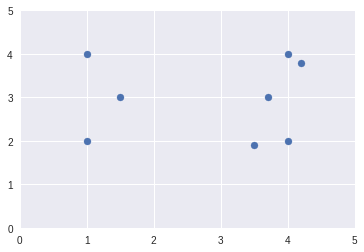

In [30]:
plt.scatter(X[:,0],X[:,1])
plt.xlim([0,5])
plt.ylim([0,5])
plt.show()

In [0]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [33]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

In [34]:
kmeans.predict([[0, 0], [4, 4]])

array([1, 0], dtype=int32)

In [35]:
kmeans.cluster_centers_

array([[3.88      , 2.94      ],
       [1.16666667, 3.        ]])

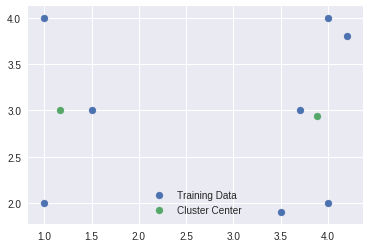

In [36]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])
plt.legend(['Training Data','Cluster Center'])
plt.show()

# 4. Scikit-learn Silhouette_score

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is $\frac{(b - a)}{\max(a, b)}$. To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [0]:
from sklearn.metrics import silhouette_score

In [0]:
score = silhouette_score(X, kmeans.labels_)

In [39]:
print(score)

0.5466880662894869


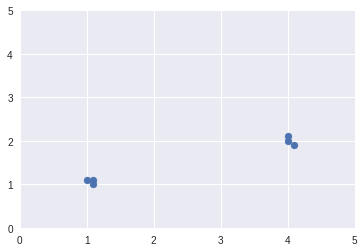

In [40]:
X = np.array([[1.1, 1.1], [1, 1.1], [1.1, 1], [4, 2], [4, 2.1], [4.1, 1.9]])
plt.scatter(X[:,0],X[:,1])
plt.xlim([0,5])
plt.ylim([0,5])
plt.show()

In [0]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [42]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [0]:
score = silhouette_score(X, kmeans.labels_)

In [0]:
print(score)

0.9568524975965825


In [0]:
#How would you figure out the best k ? (Number of clusters) 

In [0]:
ks = range(1, 7)
km = [KMeans(n_clusters=i) for i in ks]
score = [km[i].fit(X).score(X) for i in range(len(km))]

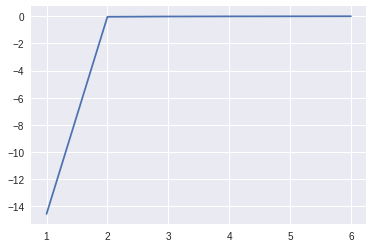

In [55]:
plt.plot(ks, score)